# 【問題1】練習のために特徴量の選択

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/suzukiyuuta/Downloads/train.csv')#教師データを読み込む
display(df.head())
display(df.info())
display(df.describe())


# def null_search(df_train):
#     for i in df_train.columns:
#         print("■■■  " + i )
#         print("NULL数:" + str(df_train[i].isnull().sum() ))#+
# #                  "　　　　NULL率:" + str((df_train[i].isnull().sum()/len(df_train)).round(3)) +
# #                  "    データの種類数:" + str(df_train[i].value_counts().count()))
# null_search(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

None

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題2】線形回帰による推定と評価
<br>
平均二乗誤差による線形回帰

In [11]:
df_X_ori = df.loc[:,['GrLivArea','YearBuilt']]
display(df_X_ori.describe())
df_Y_ori = df.loc[:,['SalePrice']]
display(df_Y_ori.describe())

df_X, X_test, df_Y, y_test = train_test_split(df_X_ori.values,df_Y_ori.values)
df_X

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


array([[2020, 1995],
       [1788, 1957],
       [ 923, 1984],
       ...,
       [1453, 1986],
       [2285, 2000],
       [1338, 2001]])

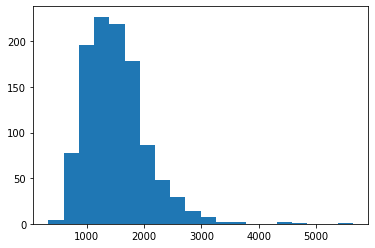

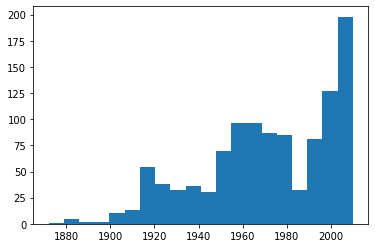

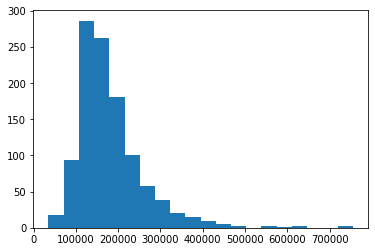

In [15]:
import matplotlib.pyplot as plt
plt.hist(df_X[:, 0], bins=20)
plt.show()
# 対数に置き換え正規化

import matplotlib.pyplot as plt
plt.hist(df_X[:, 1], bins=20)
plt.show()
# 築年数に置き換え正規化

import matplotlib.pyplot as plt
plt.hist(df_Y[:, 0], bins=20)
plt.show()
# 対数に置き換え

In [65]:
df_x_g = df_X[:, 0] #床面積を抜き出す(教師データ)
# display(df_x_g)
log_df_x_g = pd.DataFrame(np.log(df_x_g))#対数変換
# display(log_df_x_g.describe())
print(type(log_df_x_g))

X_test_g = X_test[:, 0] #床面積を抜き出す（テストデータ）
# display(X_test_g)
log_X_test_g = pd.DataFrame(np.log(X_test_g))#対数変換
# display(log_X_test_g.describe())
print(type(log_X_test_g))

df_x_y = df_X[:, 1] #建設年を抜き出す(教師データ)
# display(df_x_y)
df_x_y_con = 2020 - pd.DataFrame(df_x_y)
# display(df_x_y_con)
print(type(df_x_y_con))

X_test_y = X_test[:, 1] #建設年を抜き出す（テストデータ）
# print(X_test[:, 1].shape)
# display(X_test_y)
X_test_y_con = 2020 - pd.DataFrame(X_test_y)
# display(X_test_y_con)
print(type(X_test_y_con))

log_df_y = pd.DataFrame(np.log(df_Y)) #対数変換
# display(log_df_y.describe())
print(type(log_df_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(365,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [41]:
#特徴量を結合
df_X_con = pd.concat([log_df_x_g, df_x_y_con], axis=1,)
df_X_con

X_test_con = pd.concat([log_X_test_g, X_test_y_con], axis=1,)
X_test_con


#特徴量それぞれ標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_X_con)
df_X_con_std_train = scaler.transform(df_X_con)
# print(df_X_con)

scaler.fit(X_test_con)
X_test_con_std = scaler.transform(X_test_con)
# print(type(X_test_con_std))

# scaler.fit(log_df_y)
# df_Y_con_std = scaler.transform(log_df_y)
# print(type(df_Y_con_std))

#display(df_X_con_std.describe())
# df_X_con_std_pd = pd.DataFrame(df_X_con_std, columns=["GrLivArea", "YearBuilt"])
# df_X_con_std_pd.describe()# df_X_con_std_pd = pd.DataFrame(df_X_con_std, columns=["GrLivArea", "YearBuilt"])
# df_X_con_std_pd.describe()
# df_Y_con_std_pd = pd.DataFrame(df_Y_con_std, columns=["SalePrice"])
# df_Y_con_std_pd.describe()

             0   0
0     7.610853  25
1     7.488853  63
2     6.827629  36
3     6.773080  52
4     7.393878  17
...        ...  ..
1090  7.393263  14
1091  7.853993  14
1092  7.281386  34
1093  7.734121  20
1094  7.198931  19

[1095 rows x 2 columns]
<class 'numpy.ndarray'>


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
model = LinearRegression()
model.fit(df_X_con_std_train, log_df_y)

print(model.coef_[0])  #回帰変数の表示
print(model.intercept_)  #回帰直線の切片
# print(model.get_params())  #パラメータの取得
# print(model.predict(X_test_con))  #予測値の表示
# print(model.score(X_test_con,pd.DataFrame(np.log(y_test))))  #決定係数の表示

print(df_X_con_std_train.shape)
print(type(df_X_con_std_train))
print(log_df_y.shape)


[ 0.2570157  -0.16595637]
[12.02053575]
(1095, 2)
<class 'numpy.ndarray'>
(1095, 1)


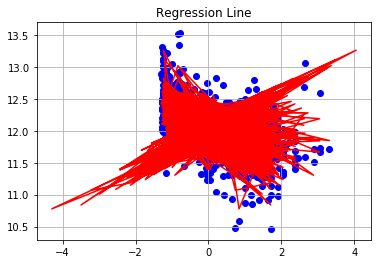

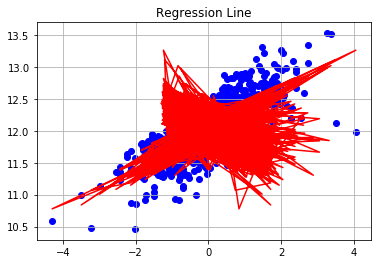

In [68]:
plt.scatter(df_X_con_std_train[:, 1], log_df_y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(df_X_con_std_train, model.predict(df_X_con_std_train), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('') # x軸のラベル
plt.ylabel('')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()    

plt.scatter(df_X_con_std_train[:, 0], log_df_y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(df_X_con_std_train, model.predict(df_X_con_std_train), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('') # x軸のラベル
plt.ylabel('')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()   